In [1]:
from datasets import load_dataset
dataset = load_dataset("textvqa", split="train")

C:\Users\dodiy\anaconda3\Lib\site-packages\datasets\load.py:1461: FutureWarning: The repository for textvqa contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/textvqa
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [2]:
dataset

Dataset({
    features: ['image_id', 'question_id', 'question', 'question_tokens', 'image', 'image_width', 'image_height', 'flickr_original_url', 'flickr_300k_url', 'answers', 'image_classes', 'set_name'],
    num_rows: 34602
})

In [17]:
from transformers import ViltProcessor, ViltForQuestionAnswering
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display
import requests

In [4]:
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

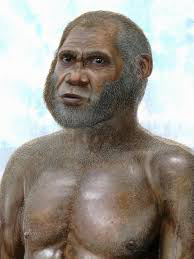

Predicted answer: man


In [5]:
image = Image.open("images (3).jpeg")
display(image)
text = "Which animal in this picture?"

# prepare inputs
encoding = processor(image, text, return_tensors="pt")

# forward pass
outputs = model(**encoding)
logits = outputs.logits
idx = logits.argmax(-1).item()
print("Predicted answer:", model.config.id2label[idx])

In [18]:
# Function to process the image and generate predictions
def predict_animal_from_url(image_url, question="Which animal is in this picture?"):
    try:
        # Download image from URL
        response = requests.get(image_url, stream=True)
        if response.status_code != 200:
            print("Failed to download image. Check the URL.")
            return
        
        image = Image.open(response.raw)
        
        # Display the image
        plt.imshow(image)
        plt.axis("off")
        plt.title("Provided Image")
        plt.show()
        
        # Process the image and question
        encoding = processor(image, question, return_tensors="pt")
        outputs = model(**encoding)
        logits = outputs.logits
        idx = logits.argmax(-1).item()
        
        # Output the prediction
        print("Predicted answer:", model.config.id2label[idx])
    except Exception as e:
        print("An error occurred:", str(e))

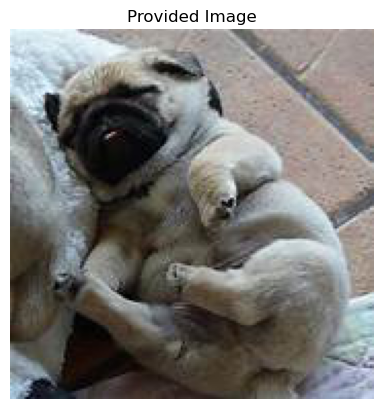

Predicted answer: dog


In [19]:
# Example usage
image_url = "https://tse3.mm.bing.net/th?id=OIP.2Vwt_ngcn-FOm0tR0fPowwEmEs&pid=Api&P=0&h=180" # Replace with your image URL
predict_animal_from_url(image_url)